# Сборник полезных рецептов

Эта тетрадка - набор "рецептов" в виде кода, который свободно можно использовать в своих проектах. Необязательно делать так же - но в случае затруднений сюда можно подглядывать. Кроме того, эта тетрадка организована блоками по порядку исследований, не каждый блок кода будет нужен в каждом исследовании, но какие-то могут быть полезны.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Загрузка данных

In [2]:
dataframe = pd.read_csv(
    'data/synthetic_data.csv',
    sep=';', # разделитель колонок
    decimal=',', # разделитель дробей у чисел
    parse_dates=['date'], # у какой колонки разбирать даты
    dayfirst=True, # первым в дате идёт номер дня
    header=0 # первая строка - заголовки
)

dataframe.head()

,date,number,value,target,group
0,2020-01-01,1,3.108266,12.747804,1
1,2020-01-02,2,3.074249,12.504289,1
2,2020-01-03,3,2.383530,8.029174,1
3,2020-01-04,4,-1.415908,0.638435,0
4,2020-01-05,5,-2.715844,4.631055,0


In [3]:
dataframe.dtypes

date      datetime64[ns]
number             int64
value            float64
target           float64
group              int64
dtype: object

Аналогично можно поступить и с Excel-файлами (при наличии некоторых предустановленных библиотек по типу `xlrd` - если их нет, будет ошибка).

In [4]:
dataframe = pd.read_excel('data/synthetic_data.xlsx', sheet_name='data')
dataframe.head()

,date,number,value,target,group
0,2020-01-01,1,3.108266,12.794800,1
1,2020-01-02,2,3.074249,12.475463,1
2,2020-01-03,3,2.383530,8.073523,1
3,2020-01-04,4,-1.415908,0.627951,0
4,2020-01-05,5,-2.715844,4.657414,0


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
date      60 non-null datetime64[ns]
number    60 non-null int64
value     60 non-null float64
target    60 non-null float64
group     60 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.5 KB


Чтение текстового файла чуть-чуть посложнее.

In [6]:
with open('data/synthetic_data.csv', 'r', encoding='utf-8') as fd:
    content = fd.read()

content.split()[:4]

['date;number;value;target;group',
 '01.01.2020;1;3,108266118;12,74780383;1',
 '02.01.2020;2;3,07424866;12,50428892;1',
 '03.01.2020;3;2,383530311;8,029174103;1']

## 2. Разведочный анализ

In [7]:
# описательные статистики
dataframe.describe(include='all')

,date,number,value,target,group
count,60,60.000000,60.000000,60.000000,60.000000
unique,60,NaN,NaN,NaN,NaN
top,2020-01-23 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2020-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2020-02-29 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,30.500000,1.083285,7.137988,0.766667
std,NaN,17.464249,2.228289,4.982911,0.426522
min,NaN,1.000000,-2.999931,-0.256627,0.000000
25%,NaN,15.750000,-0.787103,1.982625,1.000000


In [8]:
# если колонок много, эту таблицу удобно транспонировать
# без include='all' будут показаны только числовые колонки
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
number,60.0,30.500000,17.464249,1.000000,15.750000,30.500000,45.250000,60.000000
value,60.0,1.083285,2.228289,-2.999931,-0.787103,2.196329,3.028939,3.124952
target,60.0,7.137988,4.982911,-0.256627,1.982625,7.037532,12.214287,12.927017
group,60.0,0.766667,0.426522,0.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# выбор уникальных значений
pd.unique(dataframe.group)

array([1, 0], dtype=int64)

In [10]:
# подсчет количества уникальных
pd.value_counts(dataframe.group)

1    46
0    14
Name: group, dtype: int64

Основное что не следует забывать в разведочном анализе - это отсмотреть распределение как минимум целевой величины.

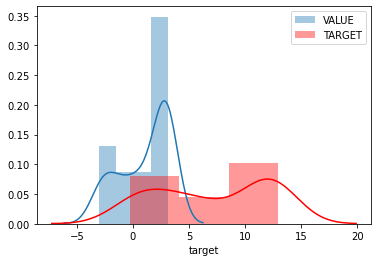

In [11]:
sns.distplot(
    dataframe.value,
    label='VALUE'
)

sns.distplot(
    dataframe.target,
    hist=True, # отображать столбчатую диаграмму
    kde=True, # отображать оценку плотности линией
    label='TARGET',
    color='red'
)

# точка с запятой в конце вывода графики нужна, чтобы 
# не отображать объект диаграммы в выводе ячейки
plt.legend(loc='best');

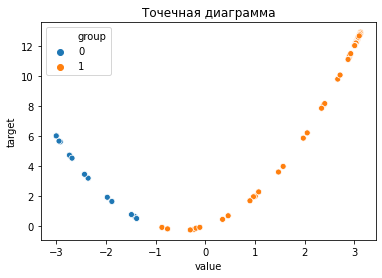

In [12]:
plt.title('Точечная диаграмма')
sns.scatterplot(x="value", y="target", hue="group", data=dataframe);

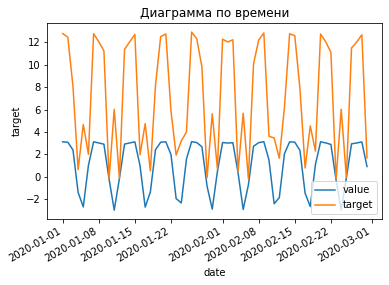

In [13]:
plt.title('Диаграмма по времени')
sns.lineplot(x="date", y="value", data=dataframe, label="value")
sns.lineplot(x="date", y="target", data=dataframe, label="target")

# метод форматирования отображения дат для get current figure (gcf)
plt.gcf().autofmt_xdate();

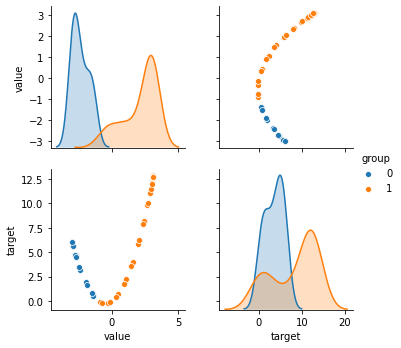

In [14]:
# ну и конечно же попарные диаграммы
sns.pairplot(
    hue='group',
    data=dataframe,
    # выбрать только конкретные колонки
    vars=['value', 'target']
);

## 3. Подготовка данных

In [15]:
# заполнение пропусков в колонке средним значением
dataframe['group'] = dataframe['group'].fillna('mean')

# заполнение пропусков в колонке нулем
dataframe['group'] = dataframe['group'].fillna(0)

# удаление всех строк с пропущенными значениями
dataframe = dataframe.dropna()

# удаление всех колонок с пропущенными значениями
dataframe = dataframe.dropna(axis='columns')

# случайная выборка из набора данных
dataframe.sample(2)

,date,number,value,target,group
27,2020-01-28,28,2.665937,9.801745,1
14,2020-01-15,15,3.105115,12.718258,1


In [16]:
# добавление новой колонки как функции двух других
dataframe['function'] = dataframe['target'] * dataframe['group']
dataframe['function'].describe()

count    60.000000
mean      6.315458
std       5.672449
min      -0.256627
25%       0.000000
50%       7.037532
75%      12.214287
max      12.927017
Name: function, dtype: float64

In [17]:
# удаление колонки
dataframe = dataframe.drop('function', axis='columns')
dataframe.columns

Index(['date', 'number', 'value', 'target', 'group'], dtype='object')

Перейдем к `numpy`-массивам.

In [18]:
X = dataframe[['number', 'value']].values
y = dataframe['target'].values
z = dataframe['group'].values

print('X shape', X.shape)
print('y shape', y.shape)
print('z shape', z.shape)

X shape (60, 2)
y shape (60,)
z shape (60,)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, z_train, z_test, indices_train, indices_test = train_test_split(
    X, y, z, dataframe.index, # z, index, и даже y - необязательно, то есть можно X_train, X_test = train_test_split(X, random_state=...)
    random_state=1, # зафиксируем генератор случайных чисел для воспроизводимости
    test_size=0.2, # 20% тестовое множество
    stratify=z # сохранять пропорции классов в разбиениях
    # также по умолчанию этот метод перемешивает данные
)

print('X train shape:', X_train.shape, 'X test shape:', X_test.shape)
print('y train shape:', y_train.shape, 'y test shape:', y_test.shape)
print('z train shape:', z_train.shape, 'z test shape:', z_test.shape)

X train shape: (48, 2) X test shape: (12, 2)
y train shape: (48,) y test shape: (12,)
z train shape: (48,) z test shape: (12,)


In [20]:
# кодировщик, который кодирует категориальные переменные векторами из 1 и 0
from sklearn.preprocessing import OneHotEncoder

# поскольку категории заранее известны, подгонять можно на всём множестве
encoder = OneHotEncoder(
    sparse=False # скажем не использовать разреженные матрицы
).fit(z.reshape(-1, 1))
encoder.transform(z.reshape(-1, 1))[0:2]

array([[0., 1.],
       [0., 1.]])

In [21]:
# кодировщик, который для числовых переменных вычитает среднее и делит на разброс
from sklearn.preprocessing import StandardScaler  

# числовые кодировщики следует настраивать на тренировочном множестве
scaler = StandardScaler().fit(X_train)
scaler.transform(X_test)[0:2]

array([[ 0.45012556,  0.7951007 ],
       [-0.3916677 , -1.34121405]])

In [22]:
# так можно делать "пайплайны" - цепочки преобразований

from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pipeline = make_pipeline(
    StandardScaler(),
    PCA(n_components=2, random_state=1)
)

pipeline.fit(X_train)
pipeline.transform(X_test[0:2])

array([[-0.88050793, -0.24393426],
       [ 1.22533244,  0.67143067]])

In [23]:
# при желании, можно добавить колонку
# и подогнать и преобразовать сразу

transformed = pipeline.fit_transform(np.column_stack([
    X_train, encoder.transform(z_train.reshape(-1, 1))
]))

transformed[0:2]

array([[-0.75066542, -1.0823111 ],
       [-0.23549609, -0.41111515]])

In [24]:
# есть и другие интересные препроцессоры
from sklearn.preprocessing import PolynomialFeatures

pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=True, interaction_only=False),
    StandardScaler()
)

pipeline.fit(X_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler())])

## 4. Построение моделей

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.metrics import r2_score, mean_absolute_error, confusion_matrix, silhouette_score

Для `scikit-learn` всё достаточно просто. **fit-predict-score** :)

In [26]:
linear = LinearRegression().fit(
    pipeline.transform(X_train), y_train
)

"R2 test score %.3f" % linear.score(pipeline.transform(X_test), y_test)

'R2 test score 1.000'

In [27]:
"MAE test %.3f" % mean_absolute_error(y_test, linear.predict(pipeline.transform(X_test)))

'MAE test 0.027'

In [28]:
logistic = LogisticRegression(random_state=1).fit(
    X_train, z_train
)

"Test set accuracy %.3f" % logistic.score(X_test, z_test)

'Test set accuracy 1.000'

In [29]:
confusion_matrix(logistic.predict(X_test), z_test)

array([[3, 0],
       [0, 9]], dtype=int64)

In [30]:
clusterer = KMeans(n_clusters=2).fit(pipeline.transform(X))
"silhouette score %.3f" % silhouette_score(
    pipeline.transform(X),
    clusterer.labels_
)

'silhouette score 0.364'

## 5. Визуализация прогнозов

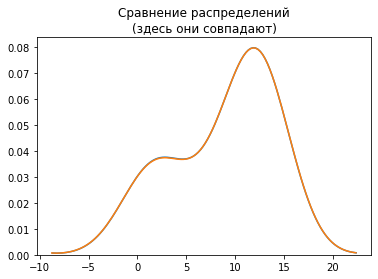

In [31]:
plt.title('Сравнение распределений\n(здесь они совпадают)')
sns.distplot(y_test, hist=False)
sns.distplot(linear.predict(pipeline.transform(X_test)), hist=False);

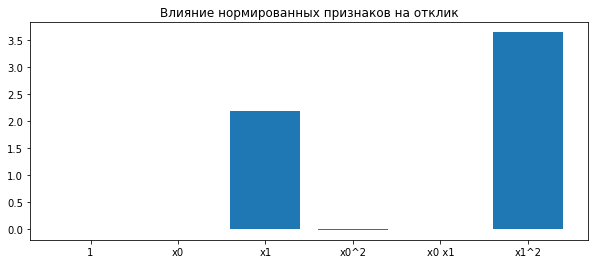

In [32]:
# у пайплайна возможно перечислить все его компоненты
featurer = pipeline.steps[0][1]

plt.figure(figsize=(10, 4))
plt.title('Влияние нормированных признаков на отклик')
plt.bar(featurer.get_feature_names(), linear.coef_);

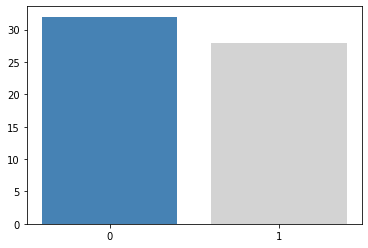

In [33]:
# еще барчарт
plt.bar(pd.unique(clusterer.labels_).astype(str), pd.value_counts(clusterer.labels_), color=['steelblue', 'lightgray']);

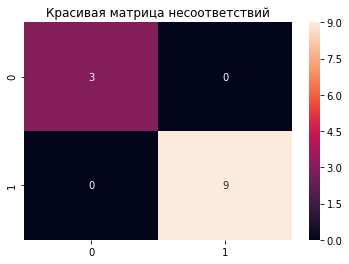

In [34]:
plt.title('Красивая матрица несоответствий')
sns.heatmap(confusion_matrix(logistic.predict(X_test), z_test), annot=True);

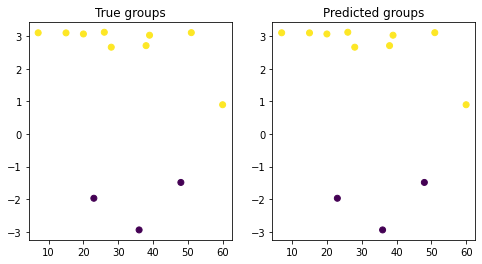

In [35]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('True groups')
plt.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=z_test
)
plt.subplot(1, 2, 2)
plt.title('Predicted groups')
plt.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=logistic.predict(X_test)
);

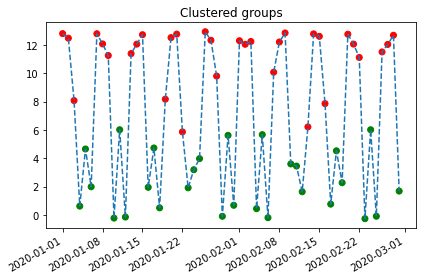

In [36]:
plt.title('Clustered groups')

plt.plot(
    dataframe.date,
    dataframe.target,
    ls='--'
)
plt.scatter(
    dataframe.date,
    dataframe.target,
    c=[
        'red' if cluster == 0 else 'green' \
        for cluster in clusterer.labels_
    ]
)
plt.gcf().autofmt_xdate()

# очень полезная команда - сжимает отступы у графиков
plt.tight_layout();

---
**Удачи с проектами!**